### Perform Principal component analysis and perform clustering using first 3 principal component scores (both heirarchial and k mean clustering(scree plot or elbow curve) and obtain  optimum number of clusters and check whether we have obtained same number of clusters with the original data (class column we have ignored at the begining who shows it has 3 clusters)


In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale

In [2]:
wine = pd.read_csv('wine.csv')
wine

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [3]:
wine.value_counts('Type')

Type
2    71
1    59
3    48
dtype: int64

In [4]:
wine.shape

(178, 14)

In [5]:
wine.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [6]:
wine.tail()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
177,3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


In [7]:
wine.use = wine.iloc[:, 1:14]
wine.use.head()
#we will only consider the data after index col 1 to evaluate the PCA and accordingly build the required model

/var/folders/cs/yd2fbk6s071_fh5yv12qhf6m0000gn/T/ipykernel_19302/1174181317.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  wine.use = wine.iloc[:, 1:14]


,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [8]:
WINE = wine.use.values
WINE

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [9]:
uni_normal = scale(WINE)

In [10]:
uni_normal
#standardizing/normalizing the dataset

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [11]:
pca = PCA(n_components = 10)
pca_values = pca.fit_transform (uni_normal)
# taking 10 components and accordingly normalizing the PCA data

In [12]:
pca_values

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01, ...,
         6.51390947e-02,  6.41442706e-01,  1.02095585e+00],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00, ...,
         1.02441595e+00, -3.08846753e-01,  1.59701372e-01],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01, ...,
        -3.44216131e-01, -1.17783447e+00,  1.13360857e-01],
       ...,
       [-2.67783946e+00, -2.76089913e+00, -9.40941877e-01, ...,
         4.70238043e-02,  1.22214687e-03, -2.47997312e-01],
       [-2.38701709e+00, -2.29734668e+00, -5.50696197e-01, ...,
         3.90828774e-01,  5.74476725e-02,  4.91489502e-01],
       [-3.20875816e+00, -2.76891957e+00,  1.01391366e+00, ...,
        -2.92913734e-01,  7.41660423e-01, -1.17969019e-01]])

In [13]:
var = pca.explained_variance_ratio_
var

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019])

In [14]:
var1 = np.cumsum(np.round(var, decimals =4)*100)
var1
#compounded value of PCAs for assessing the values to build the final model

array([36.2 , 55.41, 66.53, 73.6 , 80.16, 85.1 , 89.34, 92.02, 94.24,
       96.17])

In [15]:
pca.components_

array([[ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
         0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
         0.29671456,  0.37616741,  0.28675223],
       [-0.48365155, -0.22493093, -0.31606881,  0.0105905 , -0.299634  ,
        -0.06503951,  0.00335981, -0.02877949, -0.03930172, -0.52999567,
         0.27923515,  0.16449619, -0.36490283],
       [-0.20738262,  0.08901289,  0.6262239 ,  0.61208035,  0.13075693,
         0.14617896,  0.1506819 ,  0.17036816,  0.14945431, -0.13730621,
         0.08522192,  0.16600459, -0.12674592],
       [-0.0178563 ,  0.53689028, -0.21417556,  0.06085941, -0.35179658,
         0.19806835,  0.15229479, -0.20330102,  0.39905653,  0.06592568,
        -0.42777141,  0.18412074, -0.23207086],
       [-0.26566365,  0.03521363, -0.14302547,  0.06610294,  0.72704851,
        -0.14931841, -0.10902584, -0.50070298,  0.13685982, -0.07643678,
        -0.17361452, -0.10116099, -0.1578688 ],
       [-0.21353865, -0.536813

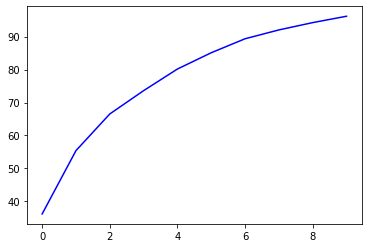

In [16]:
# checking the variance plot for PCA components obtained
plt.plot(var1, color ='blue')
# below line depicts the best line to convert the many features data into 2 dimensional

In [17]:
pca_values[:, 0:1]

array([[ 3.31675081],
       [ 2.20946492],
       [ 2.51674015],
       [ 3.75706561],
       [ 1.00890849],
       [ 3.05025392],
       [ 2.44908967],
       [ 2.05943687],
       [ 2.5108743 ],
       [ 2.75362819],
       [ 3.47973668],
       [ 1.7547529 ],
       [ 2.11346234],
       [ 3.45815682],
       [ 4.31278391],
       [ 2.3051882 ],
       [ 2.17195527],
       [ 1.89897118],
       [ 3.54198508],
       [ 2.0845222 ],
       [ 3.12440254],
       [ 1.08657007],
       [ 2.53522408],
       [ 1.64498834],
       [ 1.76157587],
       [ 0.9900791 ],
       [ 1.77527763],
       [ 1.23542396],
       [ 2.18840633],
       [ 2.25610898],
       [ 2.50022003],
       [ 2.67741105],
       [ 1.62857912],
       [ 1.90269086],
       [ 1.41038853],
       [ 1.90382623],
       [ 1.38486223],
       [ 1.12220741],
       [ 1.5021945 ],
       [ 2.52980109],
       [ 2.58809543],
       [ 0.66848199],
       [ 3.07080699],
       [ 0.46220914],
       [ 2.10135193],
       [ 1

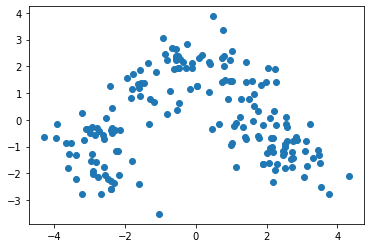

In [18]:
# plotting between PCA1 and PCA2
x = pca_values[:, 0:1]
y = pca_values[:, 1:2]
plt.scatter(x,y)

In [19]:
pca_values.shape

(178, 10)

In [20]:
wine_new = pd.DataFrame(pca_values, columns = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

In [21]:
wine_new
# the new dataframe to be used for clustering technique and find the groups closer to each other

,1,2,3,4,5,6,7,8,9,10
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,0.065139,0.641443,1.020956
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1.024416,-0.308847,0.159701
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,-0.344216,-1.177834,0.113361
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337,0.643593,0.052544,0.239413
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074,0.416700,0.326819,-0.078366
...,...,...,...,...,...,...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,1.058527,-0.574164,-1.108788,0.958416,-0.146097,-0.022498,-0.304117
174,-2.601956,-1.757229,0.207581,0.349496,0.255063,-0.026465,0.146894,-0.552427,-0.097969,-0.206061
175,-2.677839,-2.760899,-0.940942,0.312035,1.271355,0.273068,0.679235,0.047024,0.001222,-0.247997
176,-2.387017,-2.297347,-0.550696,-0.688285,0.813955,1.178783,0.633975,0.390829,0.057448,0.491490


## Creating a hierarchical clustering basis the new data frame (PCA)


In [22]:
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns
import scipy.cluster.hierarchy as sch

In [23]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return(x)

In [24]:
df_norm = norm_func(wine_new.iloc[:, 0:])
df_norm
#standardizing the values

,1,2,3,4,5,6,7,8,9,10
0,0.884094,0.280447,0.445028,0.400345,0.437402,0.325113,0.520600,0.482242,0.737924,0.858230
1,0.755241,0.520989,0.257653,0.389010,0.284305,0.189827,0.393553,0.772077,0.370065,0.553853
2,0.790998,0.336264,0.560688,0.541134,0.285371,0.473850,0.480279,0.358559,0.033678,0.537475
3,0.935332,0.102712,0.443975,0.517645,0.275579,0.390196,0.291215,0.657016,0.509960,0.582023
4,0.615534,0.358103,0.665806,0.371285,0.373859,0.289978,0.484931,0.588462,0.616133,0.469717
...,...,...,...,...,...,...,...,...,...,...
173,0.105908,0.175825,0.427221,0.591075,0.233335,0.154878,0.605350,0.418419,0.480912,0.389934
174,0.195345,0.237971,0.482621,0.484939,0.366871,0.363091,0.415354,0.295650,0.451696,0.424588
175,0.186515,0.102099,0.366964,0.479332,0.530531,0.420714,0.539987,0.476768,0.490094,0.409767
176,0.220357,0.164852,0.406262,0.329594,0.456873,0.594952,0.529391,0.580645,0.511859,0.671110


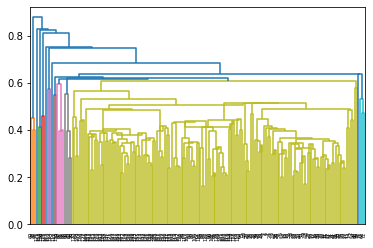

In [25]:
# lets see a quick visualization of the data using dendrogram
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='centroid'))

#### CREATING CLUSTERS USING THE NORMALIZED DATA

In [26]:
hc = AgglomerativeClustering(n_clusters= 3, affinity = 'euclidean', linkage ='single')

In [27]:
y_hc = hc.fit_predict(df_norm)
Clusters = pd.DataFrame(y_hc, columns =['Clusters'])

In [28]:
Clusters

,Clusters
0,0
1,0
2,0
3,0
4,0
...,...
173,0
174,0
175,0
176,0


In [29]:
wine_new ['clusterid_new'] = Clusters

In [30]:
wine_new.sort_values('clusterid_new')

,1,2,3,4,5,6,7,8,9,10,clusterid_new
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,0.065139,0.641443,1.020956,0
113,-0.457072,2.269416,1.061339,-0.837432,-0.323451,1.003117,-0.504431,0.741034,-0.423271,-0.506967,0
114,-0.494186,1.939045,1.323938,-0.061597,-0.848908,-0.033178,-0.982133,0.958457,0.372765,0.366883,0
115,0.482074,3.871784,1.344271,-0.899910,-0.932358,0.969370,1.403108,-0.678791,-0.097194,-1.354187,0
116,-0.252889,2.821492,-0.302640,0.457967,0.371087,0.048265,-0.568166,-0.142282,-0.161244,0.843830,0
...,...,...,...,...,...,...,...,...,...,...,...
177,-3.208758,-2.768920,1.013914,0.596903,-0.895193,0.296092,0.005741,-0.292914,0.741660,-0.117969,0
78,1.262931,0.770850,-1.184225,-0.925882,2.613593,1.597796,2.013758,-0.172479,-0.156503,0.576170,1
95,2.543865,-0.169274,0.788697,-1.032837,3.731079,1.351679,2.644070,-0.533110,0.158157,0.529677,1
69,1.975620,1.403283,-1.238276,-1.152306,4.186657,0.492998,1.456546,-1.042477,0.374379,0.416113,1


In [31]:
wine_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   1              178 non-null    float64
 1   2              178 non-null    float64
 2   3              178 non-null    float64
 3   4              178 non-null    float64
 4   5              178 non-null    float64
 5   6              178 non-null    float64
 6   7              178 non-null    float64
 7   8              178 non-null    float64
 8   9              178 non-null    float64
 9   10             178 non-null    float64
 10  clusterid_new  178 non-null    int64  
dtypes: float64(10), int64(1)
memory usage: 15.4 KB


In [32]:
wine_new.value_counts('clusterid_new')

clusterid_new
0    174
1      3
2      1
dtype: int64

In [33]:
wine_new.groupby('clusterid_new').agg(['mean'])

,1,2,3,4,5,6,7,8,9,10
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
clusterid_new,,,,,,,,,,
0,-0.040912,-0.010066,-0.021331,0.016506,-0.061884,-0.024388,-0.031689,-0.000177,-0.004552,-0.007300
1,1.927472,0.668286,-0.544601,-1.037009,3.510443,1.147491,2.038125,-0.582689,0.125344,0.507320
2,1.336322,-0.253337,5.345388,0.239038,0.236503,0.800979,-0.600402,1.778778,0.416032,-0.251811


### We can conclude that there are potentially only one cluster that can be made. However the original dataset had 3 equally distributed groups

### KMeans Clustering to see if there are any changes

In [34]:
from sklearn.cluster import KMeans

In [35]:
wine_new

,1,2,3,4,5,6,7,8,9,10,clusterid_new
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,0.065139,0.641443,1.020956,0
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1.024416,-0.308847,0.159701,0
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,-0.344216,-1.177834,0.113361,0
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337,0.643593,0.052544,0.239413,0
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074,0.416700,0.326819,-0.078366,0
...,...,...,...,...,...,...,...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,1.058527,-0.574164,-1.108788,0.958416,-0.146097,-0.022498,-0.304117,0
174,-2.601956,-1.757229,0.207581,0.349496,0.255063,-0.026465,0.146894,-0.552427,-0.097969,-0.206061,0
175,-2.677839,-2.760899,-0.940942,0.312035,1.271355,0.273068,0.679235,0.047024,0.001222,-0.247997,0
176,-2.387017,-2.297347,-0.550696,-0.688285,0.813955,1.178783,0.633975,0.390829,0.057448,0.491490,0


In [36]:
wine_k = wine_new.drop(['clusterid_new'], axis=1)

In [37]:
wine_k

,1,2,3,4,5,6,7,8,9,10
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,0.065139,0.641443,1.020956
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1.024416,-0.308847,0.159701
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,-0.344216,-1.177834,0.113361
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337,0.643593,0.052544,0.239413
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074,0.416700,0.326819,-0.078366
...,...,...,...,...,...,...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,1.058527,-0.574164,-1.108788,0.958416,-0.146097,-0.022498,-0.304117
174,-2.601956,-1.757229,0.207581,0.349496,0.255063,-0.026465,0.146894,-0.552427,-0.097969,-0.206061
175,-2.677839,-2.760899,-0.940942,0.312035,1.271355,0.273068,0.679235,0.047024,0.001222,-0.247997
176,-2.387017,-2.297347,-0.550696,-0.688285,0.813955,1.178783,0.633975,0.390829,0.057448,0.491490


In [38]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_wine  = scaler.fit_transform(wine_k.iloc[:, :])

In [39]:
scaled_wine
#normalized the data to find the KMeans clusters

array([[0.88409355, 0.28044707, 0.44502757, ..., 0.48224166, 0.73792428,
        0.85822973],
       [0.75524083, 0.52098937, 0.25765258, ..., 0.77207723, 0.37006521,
        0.5538526 ],
       [0.79099786, 0.33626383, 0.56068773, ..., 0.35855922, 0.03367822,
        0.53747534],
       ...,
       [0.18651466, 0.10209875, 0.36696437, ..., 0.47676831, 0.49009354,
        0.40976725],
       [0.2203571 , 0.16485229, 0.40626225, ..., 0.58064543, 0.51185856,
        0.6711103 ],
       [0.12473268, 0.10101298, 0.56381901, ..., 0.37405971, 0.77671877,
        0.45572073]])

In [40]:
kmeans = KMeans (n_clusters = 3, random_state =0)
kmeans.fit(scaled_wine)

KMeans(n_clusters=3, random_state=0)

In [41]:
kmeans.inertia_

42.394591533792365

Text(0, 0.5, 'WCSS')

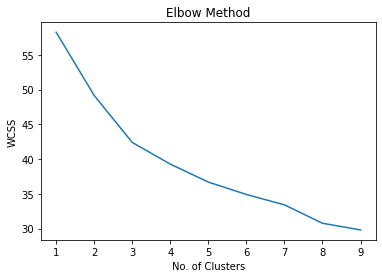

In [42]:
wcss = []
for i in range(1,10): 
    kmeans = KMeans (n_clusters=i, random_state=0)
    kmeans.fit(scaled_wine)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,10), wcss)
plt.title('Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')

In [43]:
#we can see the change reduces from 5 to 6 clusters and hence we can take 5 clusters

In [44]:
from sklearn.cluster import KMeans
clusters_k = KMeans (5, random_state=0)
clusters_k.fit(scaled_wine)

KMeans(n_clusters=5, random_state=0)

In [45]:
clusters_k.labels_

array([0, 3, 3, 0, 0, 3, 3, 0, 0, 0, 3, 3, 3, 3, 3, 3, 0, 0, 3, 0, 0, 3,
       0, 3, 0, 0, 3, 3, 0, 0, 3, 3, 0, 0, 3, 0, 3, 3, 3, 0, 0, 3, 3, 0,
       0, 0, 0, 0, 0, 0, 3, 3, 0, 3, 0, 0, 0, 3, 3, 2, 2, 2, 2, 2, 2, 3,
       2, 2, 0, 0, 4, 2, 2, 0, 3, 2, 2, 4, 0, 2, 2, 2, 2, 1, 4, 2, 2, 2,
       4, 4, 4, 4, 4, 2, 2, 0, 4, 2, 2, 2, 2, 4, 4, 2, 4, 4, 4, 4, 4, 4,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 4, 4, 0, 4, 2, 4, 4, 4, 4, 4, 4, 1, 1,
       1, 1, 4, 1, 1, 1, 1, 1, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [46]:
wine_k['clusterid_k'] = clusters_k.labels_


In [47]:
clusters_k.cluster_centers_

array([[0.74554552, 0.36387055, 0.48198065, 0.40787017, 0.38021752,
        0.33943366, 0.43699769, 0.49292049, 0.63584137, 0.57313152],
       [0.1768088 , 0.3013526 , 0.44590835, 0.45174204, 0.34847903,
        0.39100784, 0.36589444, 0.44199917, 0.49549009, 0.46072624],
       [0.52381699, 0.74903145, 0.43894782, 0.41573587, 0.30561742,
        0.38075817, 0.35034032, 0.41664957, 0.62293625, 0.32165888],
       [0.76040402, 0.37327052, 0.43000252, 0.39591063, 0.25175697,
        0.33525099, 0.35778693, 0.44728963, 0.27127587, 0.46092811],
       [0.4087719 , 0.67526134, 0.5097999 , 0.48148436, 0.31961395,
        0.38617816, 0.38873965, 0.51267452, 0.39366071, 0.65708386]])

In [48]:
wine_k.groupby('clusterid_k').agg(['mean'])

,1,2,3,4,5,6,7,8,9,10
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
clusterid_k,,,,,,,,,,
0,2.126149,-0.827224,0.201222,-0.165361,0.337942,-0.149441,0.239340,0.100483,0.377732,0.214252
1,-2.761246,-1.289036,-0.156992,0.127723,0.140853,0.118649,-0.064361,-0.068053,0.015163,-0.103806
2,0.220742,2.017911,-0.226114,-0.112815,-0.125309,0.065370,-0.130796,-0.151953,0.344394,-0.497306
3,2.253834,-0.757788,-0.314944,-0.245257,-0.459770,-0.171183,-0.098990,-0.050543,-0.564049,-0.103234
4,-0.767889,1.472980,0.477480,0.326415,-0.038393,0.093544,0.033217,0.165864,-0.247893,0.451801


In [49]:
wine_k.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   1            178 non-null    float64
 1   2            178 non-null    float64
 2   3            178 non-null    float64
 3   4            178 non-null    float64
 4   5            178 non-null    float64
 5   6            178 non-null    float64
 6   7            178 non-null    float64
 7   8            178 non-null    float64
 8   9            178 non-null    float64
 9   10           178 non-null    float64
 10  clusterid_k  178 non-null    int32  
dtypes: float64(10), int32(1)
memory usage: 14.7 KB


In [50]:
wine_k.value_counts('clusterid_k')

clusterid_k
1    46
0    37
4    34
2    31
3    30
dtype: int64

### We can see that there are more clusters which are created than the original dataset and also the groups have almost equal/consistent number of datapoints